In [147]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs


In [139]:
# Generate a synthetic dataset
np.random.seed(42)  # For reproducibility

# Generate synthetic dataset
X, y = make_blobs(n_samples=10000, centers=5, center_box=(5,20), n_features=2, random_state=42)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['TransactionAmount', 'TransactionFrequency'])
df['CustomerSegment'] = y  # This is for validation purposes and won't be used in clustering
# df['CustomerIncome'] = df.TransactionAmount.astype(int).abs() * np.random.randint(1000, 5000)
df['TransactionAmount'] = df.TransactionAmount.abs() * np.random.randint(50, 5000)
df['Customer Age'] = np.round(df.TransactionFrequency.abs(), 1)

In [142]:
df[['Customer Age', 'TransactionAmount']]

,Customer Age,TransactionAmount
0,17.9,4963.129824
1,5.8,8253.318230
2,14.2,14125.271049
3,12.8,14867.810811
4,20.8,6927.500432
...,...,...
9995,18.8,5218.021237
9996,19.8,9813.944132
9997,14.6,13218.866169
9998,13.1,15485.552385


In [145]:
df[['Customer Age', 'TransactionAmount']].to_csv('Customer_data.csv', index=False)

In [146]:
pd.read_csv('Customer_data.csv')

,Customer Age,TransactionAmount
0,17.9,4963.129824
1,5.8,8253.318230
2,14.2,14125.271049
3,12.8,14867.810811
4,20.8,6927.500432
...,...,...
9995,18.8,5218.021237
9996,19.8,9813.944132
9997,14.6,13218.866169
9998,13.1,15485.552385


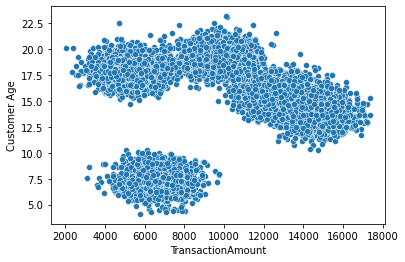

In [149]:
sns.scatterplot(x=df.TransactionAmount, y=df['Customer Age']);

In [150]:
# # Visualize the dataset
# plt.scatter(df['TransactionAmount'], df['Customer Age'], c=df['CustomerSegment'])
# plt.xlabel('Transaction Amount')
# plt.ylabel('Transaction Frequency')
# plt.title('Customer Transactions (Synthetic Data)')
# plt.show()
# # 

In [35]:
# y

In [151]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Customer Age', 'TransactionAmount']])

# Splitting dataset into training and testing for later validation (optional, depending on the approach)
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)


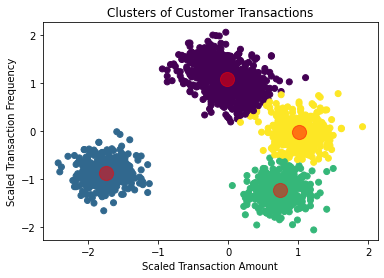

In [155]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

# Predicting the clusters
labels = kmeans.predict(X_test)

# Visualizing the clusters
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Scaled Transaction Amount')
plt.ylabel('Scaled Transaction Frequency')
plt.title('Clusters of Customer Transactions')
plt.show()


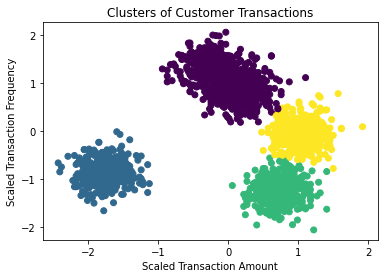

In [197]:
from sklearn.mixture import GaussianMixture


A = GaussianMixture(n_components=4, random_state=42)

A.fit(X_train)

labels = A.predict(X_test)



# Visualizing the clusters
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis')
# centers = A.c
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Scaled Transaction Amount')
plt.ylabel('Scaled Transaction Frequency')
plt.title('Clusters of Customer Transactions')
plt.show()


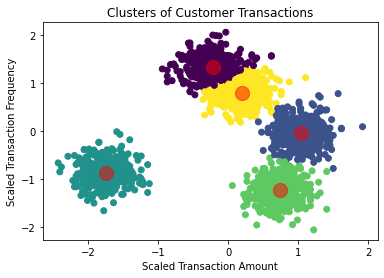

In [191]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# Predicting the clusters
labels = kmeans.predict(X_test)

# Visualizing the clusters
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.xlabel('Scaled Transaction Amount')
plt.ylabel('Scaled Transaction Frequency')
plt.title('Clusters of Customer Transactions')
plt.show()


In [198]:
# Evaluate clustering
score = silhouette_score(X_test, labels)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.6668485800629621


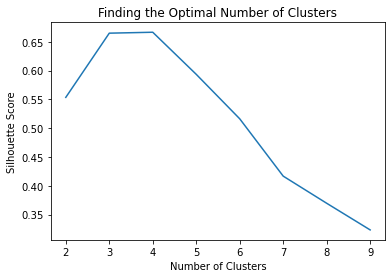

In [157]:
# Find the optimal number of clusters
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_test)
    score = silhouette_score(X_test, labels)
    scores.append(score)

# Plotting the silhouette scores
plt.plot(range(2, 10), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Finding the Optimal Number of Clusters')
plt.show()


In [158]:
# K-means Clustering
# Using the Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

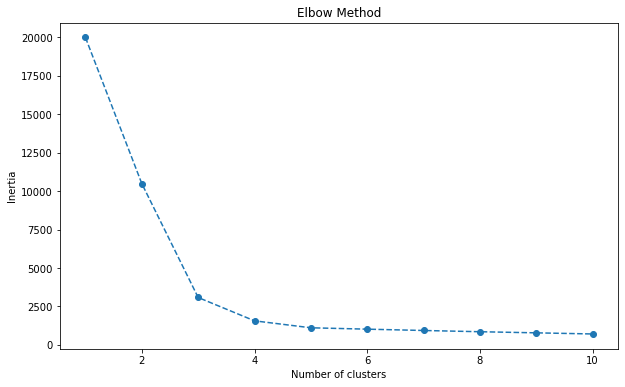

In [159]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
